In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir='.',untar=True)

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
import glob
import pathlib
data_directory = pathlib.Path(data_dir).with_suffix('')
image_count = len(list(data_directory.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_directory.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3171577977_8608282f04_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3494252600_29f26e3ff0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8692040971_826614516f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg')]

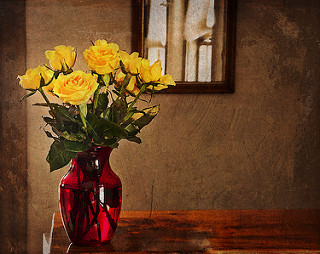

In [9]:
PIL.Image.open(str(roses[1]))

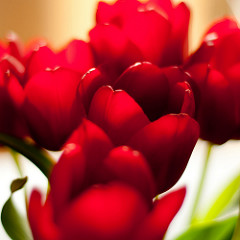

In [10]:
tulips = list(data_directory.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses':list(data_directory.glob('roses/*')),
    'daisy':list(data_directory.glob('daisy/*')),
    'dandelion':list(data_directory.glob('dandelion/*')),
    'sunflower':list(data_directory.glob('sunflowers/*')),
    'tulips':list(data_directory.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflower':3,
    'tulips':4
}

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 239, 3)

In [14]:
img

array([[[  4,   6,   6],
        [  4,   6,   6],
        [  4,   6,   6],
        ...,
        [ 37,  44,  53],
        [ 39,  46,  55],
        [ 41,  48,  57]],

       [[  4,   6,   6],
        [  4,   6,   6],
        [  4,   6,   6],
        ...,
        [ 37,  44,  53],
        [ 39,  46,  55],
        [ 41,  48,  57]],

       [[  4,   6,   6],
        [  4,   6,   6],
        [  5,   7,   7],
        ...,
        [ 37,  44,  53],
        [ 40,  47,  56],
        [ 41,  48,  57]],

       ...,

       [[ 87, 103, 120],
        [ 86, 102, 119],
        [ 86, 102, 119],
        ...,
        [ 18,  18,  24],
        [ 18,  18,  24],
        [ 17,  17,  23]],

       [[ 86, 102, 119],
        [ 86, 102, 119],
        [ 86, 102, 119],
        ...,
        [ 18,  18,  24],
        [ 17,  17,  23],
        [ 17,  17,  23]],

       [[ 85, 101, 118],
        [ 85, 101, 118],
        [ 85, 101, 118],
        ...,
        [ 18,  18,  24],
        [ 17,  17,  23],
        [ 17,  17,  23]]

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X , y = [] , []

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [20]:
X_test_scaled[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98431373, 0.99607843, 0.99607843],
        [0.98823529, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.97254902, 0.99215686, 0.98823529],
        [0.98431373, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98431373, 1.        , 0.99607843],
        [0.97647059, 0.98431373, 0.98431373],
        [0.99607843, 0.99215686, 0.99215686]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.98823529, 0

In [21]:
model = Sequential([
    # conv + pooling
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')
])


In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 4s 23ms/step - loss: 1.3219 - accuracy: 0.4506
Epoch 2/10
86/86 [==============================] - 2s 23ms/step - loss: 0.9756 - accuracy: 0.6185
Epoch 3/10
86/86 [==============================] - 2s 23ms/step - loss: 0.8060 - accuracy: 0.6944
Epoch 4/10
86/86 [==============================] - 2s 23ms/step - loss: 0.6099 - accuracy: 0.7740
Epoch 5/10
86/86 [==============================] - 2s 24ms/step - loss: 0.4185 - accuracy: 0.8507
Epoch 6/10
86/86 [==============================] - 2s 24ms/step - loss: 0.2558 - accuracy: 0.9095
Epoch 7/10
86/86 [==============================] - 2s 23ms/step - loss: 0.1444 - accuracy: 0.9499
Epoch 8/10
86/86 [==============================] - 2s 23ms/step - loss: 0.0768 - accuracy: 0.9786
Epoch 9/10
86/86 [==============================] - 2s 23ms/step - loss: 0.0422 - accuracy: 0.9909
Epoch 10/10
86/86 [==============================] - 2s 23ms/step - loss: 0.0772 - accuracy: 0.9789


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 16ms/step - loss: 2.2710 - accuracy: 0.6198


[2.271005630493164, 0.6198257207870483]

# Overfitted the model

In [24]:
predictions = model.predict(X_test_scaled)
predictions


29/29 [==============================] - 0s 11ms/step


array([[7.7572047e-08, 9.9950433e-01, 4.9553730e-04, 2.4346853e-09,
        2.2594384e-09],
       [3.6875822e-06, 9.1039827e-03, 1.4068408e-05, 7.0973084e-07,
        9.9087757e-01],
       [1.3301963e-02, 6.6570646e-01, 2.1739785e-02, 7.7084071e-05,
        2.9917470e-01],
       ...,
       [2.9514636e-14, 1.9836658e-11, 9.0223548e-06, 9.9999094e-01,
        4.3038354e-13],
       [1.0513224e-01, 3.3547752e-02, 4.9506649e-05, 7.8958471e-04,
        8.6048090e-01],
       [4.4569040e-10, 5.9928265e-05, 4.3693080e-06, 9.9985719e-01,
        7.8430974e-05]], dtype=float32)

In [25]:
prediction_label = [np.argmax(element) for element in predictions]

In [26]:
prediction_label[:5]

[1, 4, 1, 4, 1]

In [27]:
y_test[:5]

array([1, 0, 2, 4, 2])

# Data Augmentation for Overfitting Problem

In [34]:
img_height = 180
img_width = 180


In [42]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
    layers.experimental.preprocessing.RandomRotation(0.1),
])

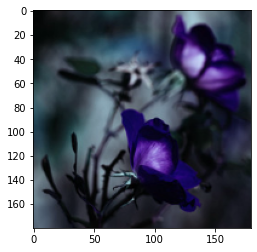

In [39]:
plt.imshow(X[0])

In [40]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[  7.8424735,  11.161377 ,  11.161377 ],
        [  7.5976663,  12.395984 ,  11.996825 ],
        [  8.       ,  14.       ,  13.       ],
        ...,
        [ 38.603756 ,  61.603756 ,  69.60375  ],
        [ 36.804913 ,  61.719524 ,  69.51094  ],
        [ 36.519726 ,  61.586464 ,  71.196976 ]],

       [[  9.252887 ,  12.111047 ,  11.964055 ],
        [  7.8294573,  12.533031 ,  12.059609 ],
        [  8.485004 ,  14.485004 ,  13.485004 ],
        ...,
        [ 37.012623 ,  59.853462 ,  67.83502  ],
        [ 35.716686 ,  60.15099  ,  67.624405 ],
        [ 36.33605  ,  60.73625  ,  70.14426  ]],

       [[  8.067091 ,  13.067091 ,  12.067091 ],
        [  7.7255173,  12.76822  ,  11.768221 ],
        [  9.94124  ,  15.47062  ,  14.47062  ],
        ...,
        [ 37.907257 ,  57.990757 ,  65.52013  ],
        [ 36.326874 ,  58.461517 ,  66.46152  ],
        [ 37.385517 ,  60.578133 ,  69.887344 ]],

       ...,

     

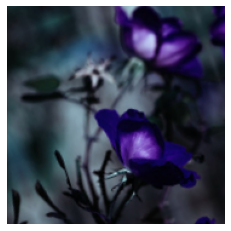

In [41]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [45]:
num_classes = 5


model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)

])

In [46]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 5s 41ms/step - loss: 1.4810 - accuracy: 0.3605
Epoch 2/10
86/86 [==============================] - 4s 50ms/step - loss: 1.0769 - accuracy: 0.5763
Epoch 3/10
86/86 [==============================] - 3s 39ms/step - loss: 0.9493 - accuracy: 0.6352
Epoch 4/10
86/86 [==============================] - 3s 40ms/step - loss: 0.8873 - accuracy: 0.6639
Epoch 5/10
86/86 [==============================] - 4s 50ms/step - loss: 0.8058 - accuracy: 0.6915
Epoch 6/10
86/86 [==============================] - 3s 39ms/step - loss: 0.7627 - accuracy: 0.7049
Epoch 7/10
86/86 [==============================] - 3s 39ms/step - loss: 0.7424 - accuracy: 0.7231
Epoch 8/10
86/86 [==============================] - 3s 39ms/step - loss: 0.7264 - accuracy: 0.7217
Epoch 9/10
86/86 [==============================] - 3s 39ms/step - loss: 0.6765 - accuracy: 0.7413
Epoch 10/10
86/86 [==============================] - 3s 39ms/step - loss: 0.6568 - accuracy: 0.7500


In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 17ms/step - loss: 0.9191 - accuracy: 0.6558


[0.9191040992736816, 0.655773401260376]